#House Price Pred

##Importing libraries and REad Data

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Data Analysis

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

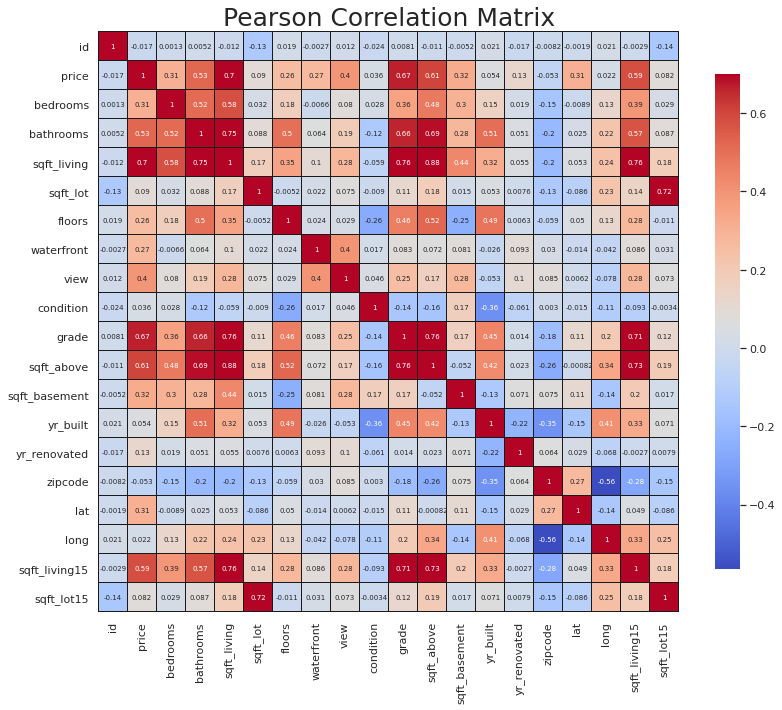

In [ ]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="coolwarm",linecolor='k',annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

In [ ]:
price_corr = df.corr()['price'].sort_values(ascending=False)
print(price_corr)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


### Discrete features

In [ ]:
discrt = []
sum = 0
for i in df.columns:
  if df[i].nunique() <= 30:
    discrt.append(i)
    sum += df[i].nunique()
    print(i,df[i].nunique(),df[i].unique())

sum,discrt


bedrooms 13 [ 3  2  4  5  1  6  7  0  8  9 11 10 33]
bathrooms 30 [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 0.   1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75
 6.25 6.5 ]
floors 6 [1.  2.  1.5 3.  2.5 3.5]
waterfront 2 [0 1]
view 5 [0 3 4 2 1]
condition 5 [3 5 4 1 2]
grade 12 [ 7  6  8 11  9  5 10 12  4  3 13  1]


(73,
 ['bedrooms',
  'bathrooms',
  'floors',
  'waterfront',
  'view',
  'condition',
  'grade'])

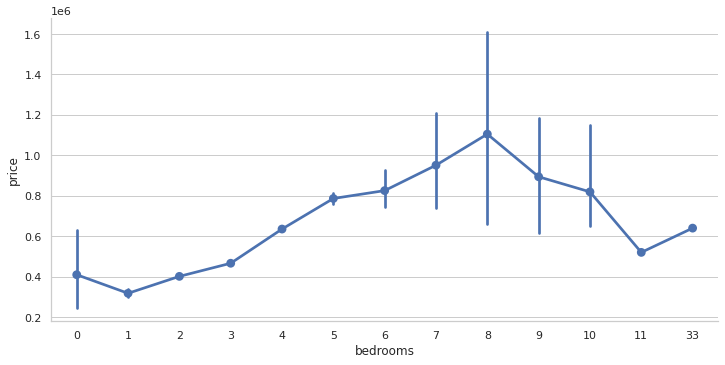

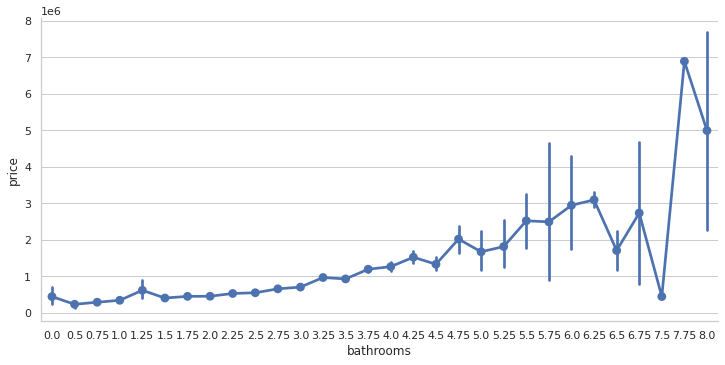

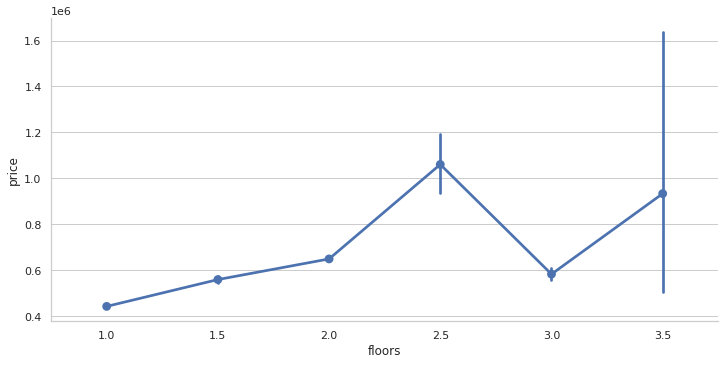

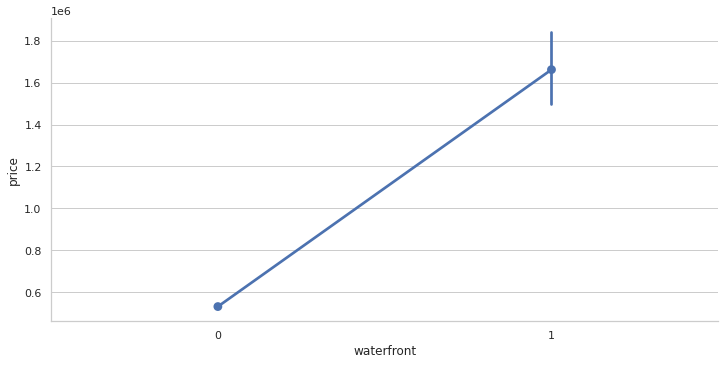

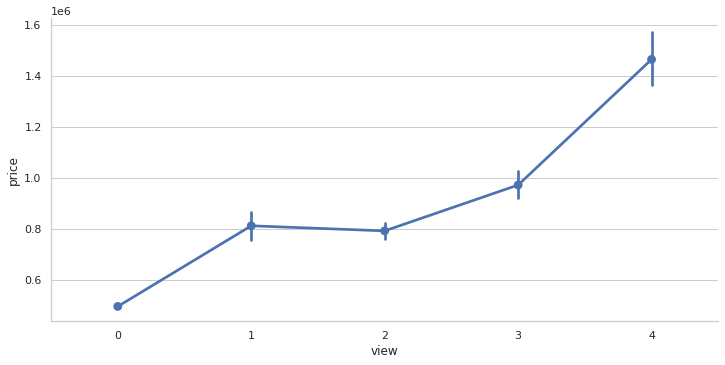

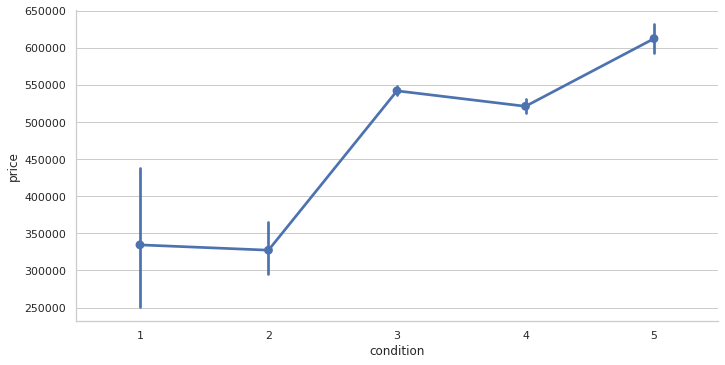

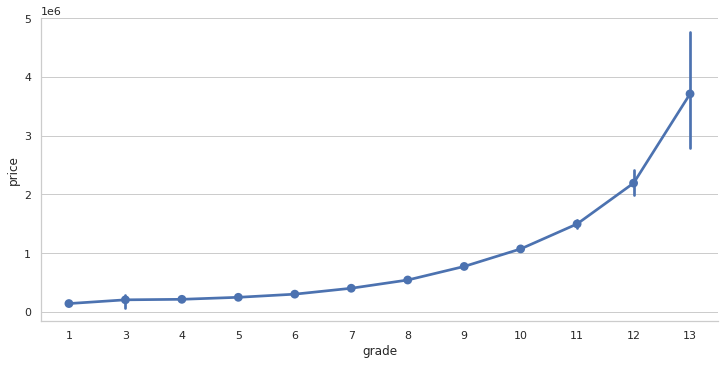

In [ ]:
for i, col in enumerate(discrt):
    sns.catplot(x=col, y='price', data=df, kind='point',aspect=2 )

### continuous features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1598: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning

<Figure size 720x432 with 0 Axes>

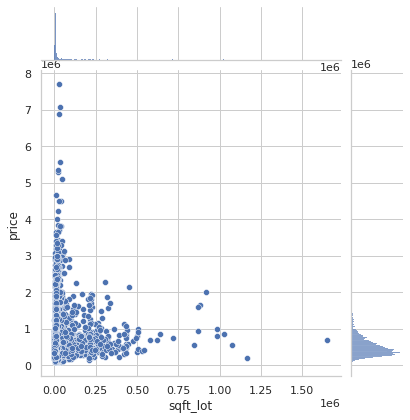

<Figure size 720x432 with 0 Axes>

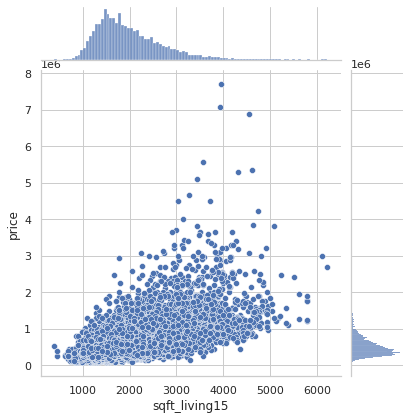

<Figure size 720x432 with 0 Axes>

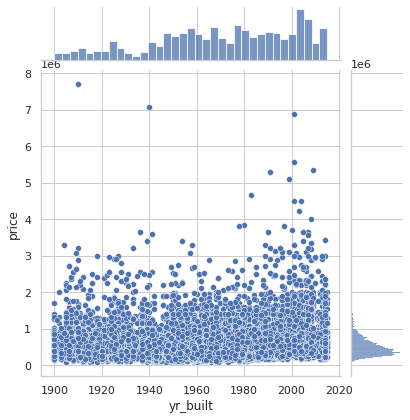

<Figure size 720x432 with 0 Axes>

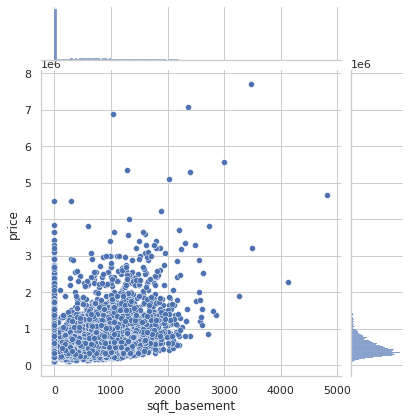

<Figure size 720x432 with 0 Axes>

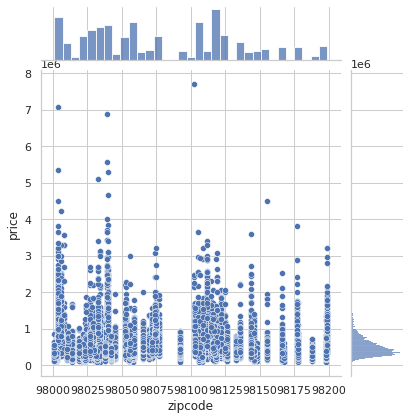

<Figure size 720x432 with 0 Axes>

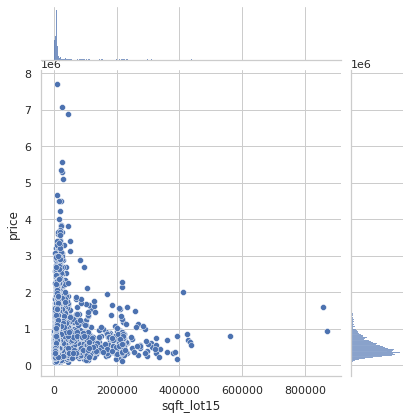

<Figure size 720x432 with 0 Axes>

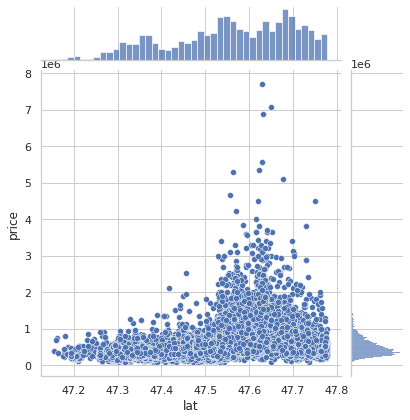

<Figure size 720x432 with 0 Axes>

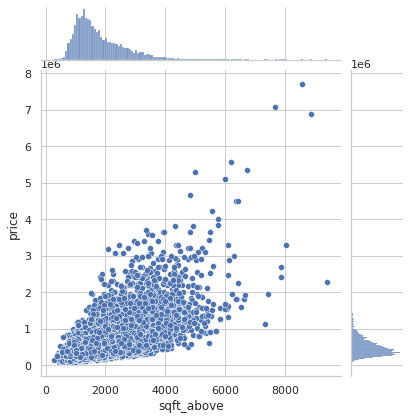

<Figure size 720x432 with 0 Axes>

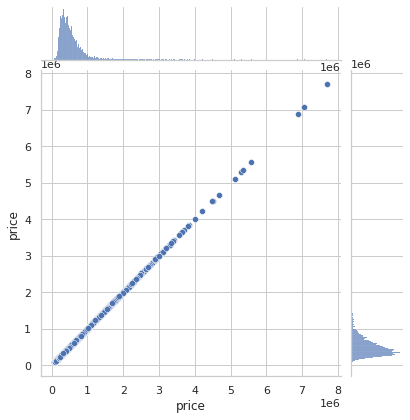

<Figure size 720x432 with 0 Axes>

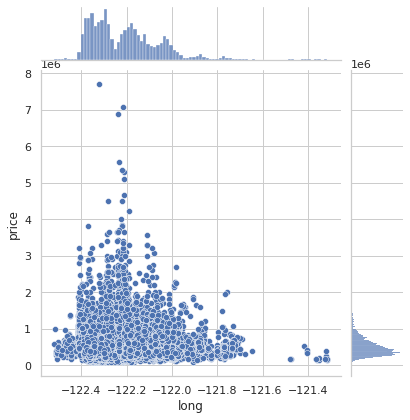

<Figure size 720x432 with 0 Axes>

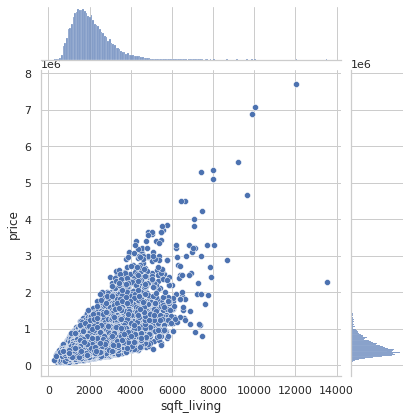

<Figure size 720x432 with 0 Axes>

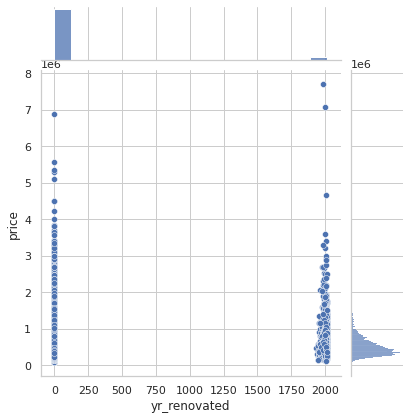

In [ ]:
for i, col in enumerate(set(df.columns)-set(discrt)-{'date','id'}):
    sns.jointplot(col, 'price' , df, kind='scatter')

<Figure size 720x432 with 0 Axes>

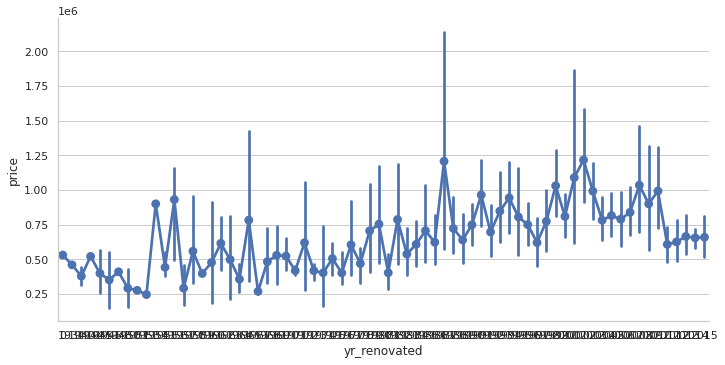

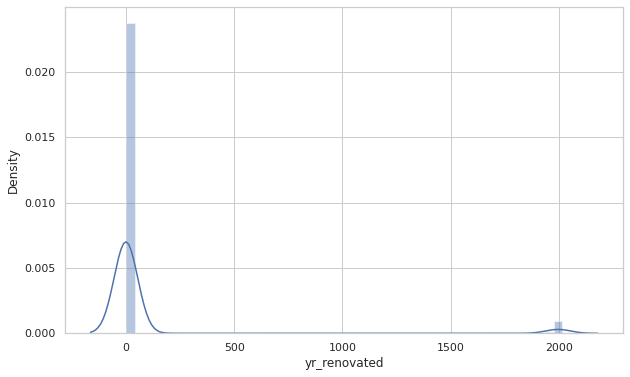

In [ ]:
np.where((df['yr_renovated']!=0),1,0).sum()
plt.figure(figsize=(10,6))
sns.catplot(x='yr_renovated', y='price', data=df, kind='point',aspect=2 )
plt.figure(figsize=(10,6))
sns.distplot(df['yr_renovated'])

## Handling Outliers 

In [ ]:
df1 = df # duplicating dataset
df1['year_sld'] = df1['date'].apply(lambda x:int(x[:4]))
df1['mnth_sld'] = df1['date'].apply(lambda x:int(x[5:7]))
df1.describe()

In [ ]:
ls_outliers = ['sqft_living','sqft_lot','sqft_above', 'sqft_basement', 'sqft_living15','sqft_lot15','price']

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
def detect_outlier(feature):
    outliers = []
    data = df[feature]
    mean = np.mean(data)
    std =np.std(data)
        
    for y in data:
        z_score= (y - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(y)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                           len([i for i in data
                                                                if i > data.quantile(.99)])))

In [ ]:
# Determine what the upperbound should be for continuous features
for feat in ls_outliers:
    detect_outlier(feat)


Outlier caps for sqft_living:
  --95p: 3760.0 / 1080 values exceed that
  --3sd: 4835.2 / 248 values exceed that
  --99p: 4978.8 / 217 values exceed that

Outlier caps for sqft_lot:
  --95p: 43339.2 / 1081 values exceed that
  --3sd: 139365.6 / 347 values exceed that
  --99p: 213008.0 / 212 values exceed that

Outlier caps for sqft_above:
  --95p: 3400.0 / 1060 values exceed that
  --3sd: 4272.6 / 254 values exceed that
  --99p: 4370.0 / 216 values exceed that

Outlier caps for sqft_basement:
  --95p: 1190.0 / 1069 values exceed that
  --3sd: 1619.2 / 247 values exceed that
  --99p: 1660.0 / 214 values exceed that

Outlier caps for sqft_living15:
  --95p: 3300.0 / 1070 values exceed that
  --3sd: 4042.7 / 237 values exceed that
  --99p: 4080.0 / 215 values exceed that

Outlier caps for sqft_lot15:
  --95p: 37062.8 / 1081 values exceed that
  --3sd: 94679.1 / 363 values exceed that
  --99p: 157687.0 / 216 values exceed that

Outlier caps for price:
  --95p: 1156480.0 / 1081 values exce

In [ ]:
# Cap features
ls_outliers = ['sqft_living','sqft_lot','sqft_above', 'sqft_basement', 'sqft_living15','sqft_lot15','price']
for feat in ls_outliers:
  df1[feat].clip(upper = df1[feat].quantile(0.99), inplace=True)

df1.describe()

## Creating dummies for discrete features

In [ ]:
disc = df1[discrt].columns
df_dummies = pd.get_dummies(df_disc, columns=df_disc.columns,drop_first=True)
df1.drop(df_disc.columns,1,inplace = True)
df1 = pd.concat([df1,df_dummies],1)
df1.head()

In [ ]:
df1.to_csv('house_price_data.csv',index=False)

## Applying Tansformation

In [ ]:
import scipy.stats
from statsmodels.graphics.gofplots import qqplot

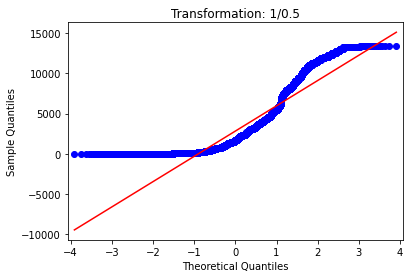

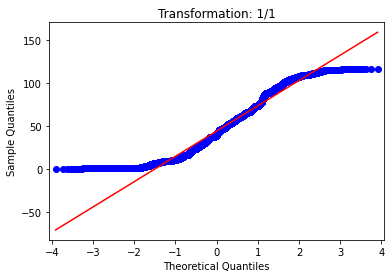

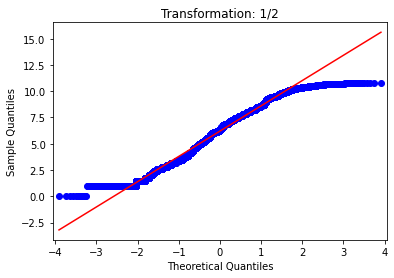

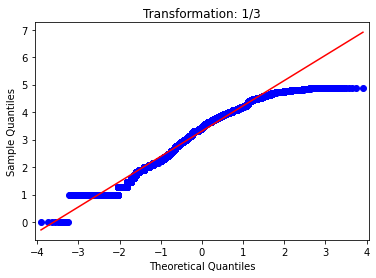

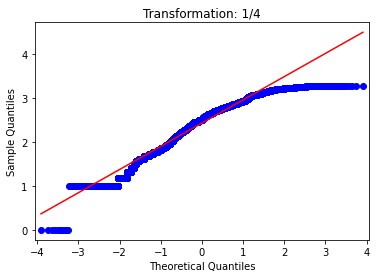

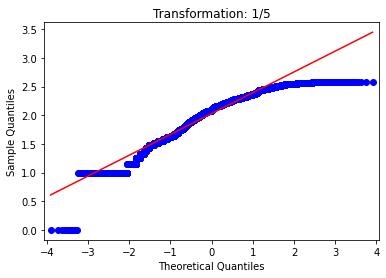

In [ ]:
# Generate QQ plots
for i in [0.5, 1, 2, 3, 4, 5]:
    data_t = df1['build_age']**(1/i)
    qqplot(data_t, line='s')
    plt.title("Transformation: 1/{}".format(str(i)))

In [ ]:
df1.head()

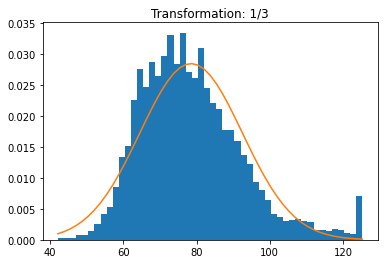

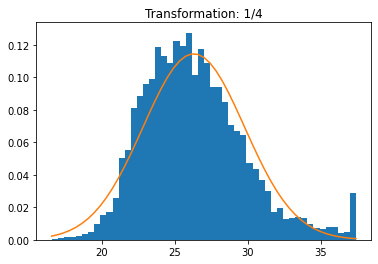

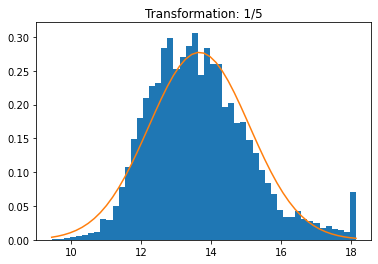

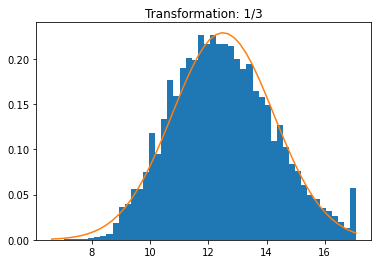

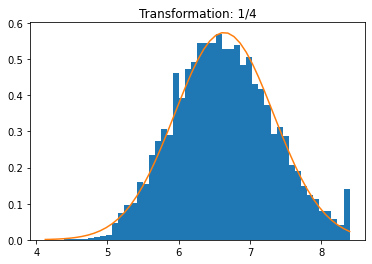

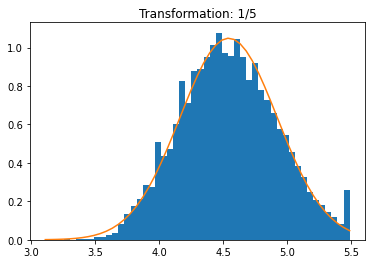

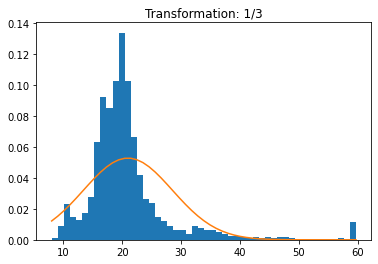

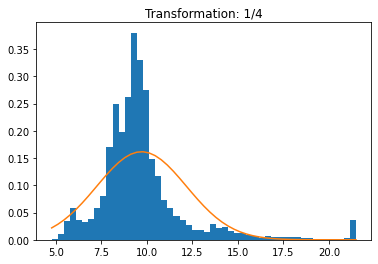

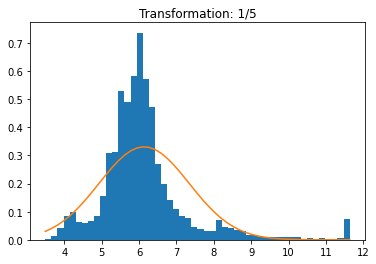

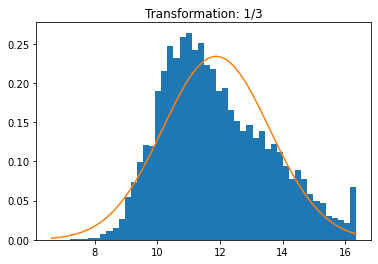

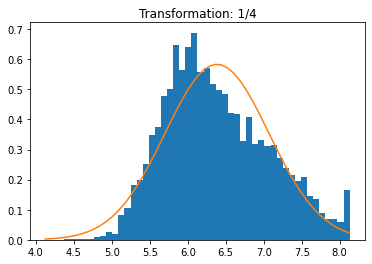

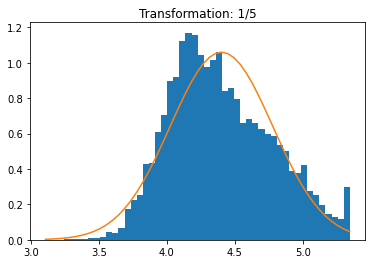

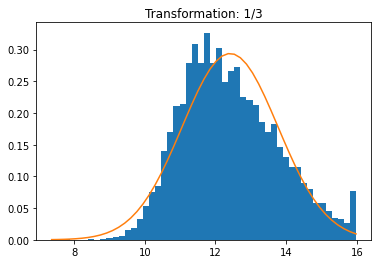

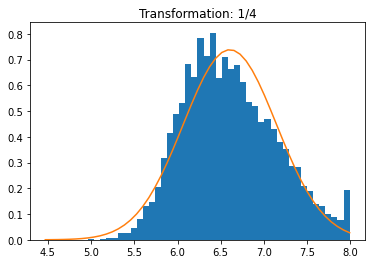

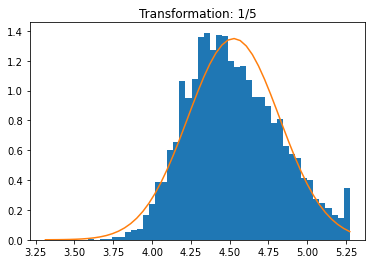

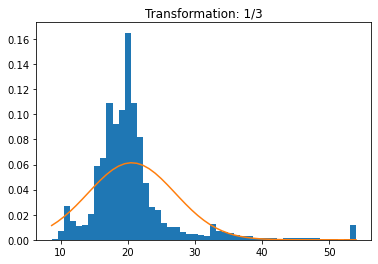

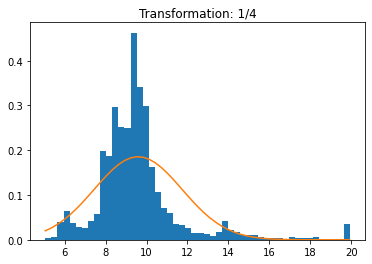

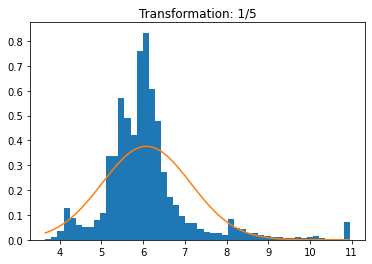

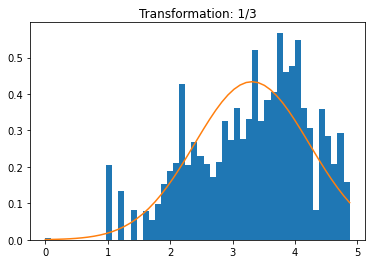

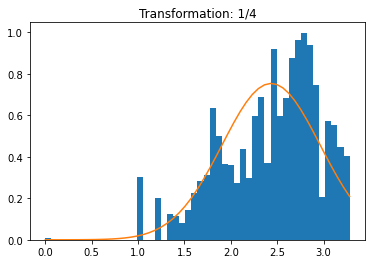

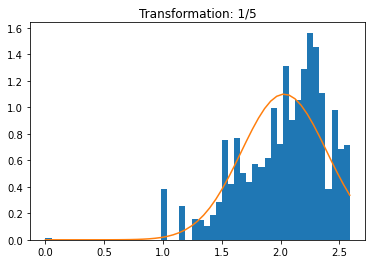

In [ ]:
# Box-Cox transformation
feats = ['sqft_lot', 'sqft_above','sqft_living15', 'sqft_lot15', 'build_age']
for feat in feats:
  for i in [3, 4, 5]:
    data_t = df1[feat]**(1/i)
    n, bins, patches = plt.hist(data_t, 50, density=True)
    mu = np.mean(data_t)
    sigma = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))
    plt.title("Transformation: 1/{}".format(str(i)))
    plt.show()

In [ ]:
for feat in feats:
  df1[feat].apply(lambda x: x**(1/5))
df1.head()

,price,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bedrooms_33,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,build_age
0,221900.0,1.00,1180.0,5650,1180,1340,5650,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,60
1,538000.0,2.25,2570.0,7242,2170,1690,7639,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,64
2,180000.0,1.00,770.0,10000,770,2720,8062,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,83
3,604000.0,3.00,1960.0,5000,1050,1360,5000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,50
4,510000.0,2.00,1680.0,8080,1680,1800,7503,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,29


In [ ]:
df1.to_csv('hse_price_dt_trasf.csv',index=False)

##test_train_split

In [ ]:
X = df1.drop(['price'],1)
y = df1['price']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Standardisation/Normalisation

In [ ]:
# Fit the scaler on the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# Scale the training, test, and validation sets
features = X_train.columns

X_train[features] = scaler.transform(X_train[features])
X_test[features] = scaler.transform(X_test[features])

X_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_living15,sqft_lot15,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bedrooms_33,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,build_age
5268,-1.448137,-0.571555,-0.305061,-0.889574,-0.318054,-0.283169,-0.098458,-0.38777,1.098913,-0.677457,-0.285962,-0.114825,-0.043061,-0.021515,-0.017008,-0.013173,-0.007605,-0.007605,-0.313696,-0.784593,-0.08937,-0.174864,-0.020125,-0.090676,-0.127834,-0.218522,-0.155069,-0.123801,-0.090025,-1.366329,1.682603,-0.291487,-0.013173,-0.036497,-0.107079,-0.32186,1.192722,-0.629768,-0.37081,-0.233782,-0.139706,-0.062837,-0.026354,1.072976
16909,0.494296,-0.332078,-0.108758,-0.714270,0.488577,-0.117253,-0.098458,-0.38777,1.098913,-0.677457,-0.285962,-0.114825,-0.043061,-0.021515,-0.017008,-0.013173,-0.007605,-0.007605,-0.313696,-0.784593,-0.08937,-0.174864,-0.020125,-0.090676,-0.127834,-0.218522,-0.155069,-0.123801,-0.090025,-1.366329,1.682603,-0.291487,-0.013173,-0.036497,-0.107079,-0.32186,-0.838418,1.587887,-0.37081,-0.233782,-0.139706,-0.062837,-0.026354,-0.317418
16123,-0.800659,-1.118931,-0.149449,-0.864530,-0.407680,-0.109157,-0.098458,-0.38777,1.098913,-0.677457,-0.285962,-0.114825,-0.043061,-0.021515,-0.017008,-0.013173,-0.007605,-0.007605,-0.313696,-0.784593,-0.08937,-0.174864,-0.020125,-0.090676,-0.127834,-0.218522,-0.155069,-0.123801,-0.090025,0.731888,-0.594317,-0.291487,-0.013173,-0.036497,-0.107079,-0.32186,-0.838418,1.587887,-0.37081,-0.233782,-0.139706,-0.062837,-0.026354,-0.520890
12181,0.494296,0.158279,-0.248959,0.537904,-0.019302,-0.252185,-0.098458,-0.38777,-0.909990,1.476107,-0.285962,-0.114825,-0.043061,-0.021515,-0.017008,-0.013173,-0.007605,-0.007605,-0.313696,1.274546,-0.08937,-0.174864,-0.020125,-0.090676,-0.127834,-0.218522,-0.155069,-0.123801,-0.090025,0.731888,-0.594317,-0.291487,-0.013173,-0.036497,-0.107079,-0.32186,-0.838418,1.587887,-0.37081,-0.233782,-0.139706,-0.062837,-0.026354,-0.758274
12617,0.494296,-0.309271,-0.331771,-0.676704,-0.288179,-0.363978,-0.098458,-0.38777,1.098913,-0.677457,-0.285962,-0.114825,-0.043061,-0.021515,-0.017008,-0.013173,-0.007605,-0.007605,-0.313696,1.274546,-0.08937,-0.174864,-0.020125,-0.090676,-0.127834,-0.218522,-0.155069,-0.123801,-0.090025,0.731888,-0.594317,-0.291487,-0.013173,-0.036497,-0.107079,-0.32186,1.192722,-0.629768,-0.37081,-0.233782,-0.139706,-0.062837,-0.026354,-0.486978


In [ ]:
X_train.to_csv('train_features.csv', index=False)
X_test.to_csv('test_features.csv', index=False)

y_train.to_csv('train_labels.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)